# Alternative Approach to Removing/Imputing Values

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
users = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/users_clean.csv')

In [3]:
# Rename RESPID column to "User"
users = users.rename(columns = {'RESPID': 'User'})
users = users.ix[:,1:]

In [4]:
users.describe()

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,User,AGE,LIST_OWN,LIST_BACK,Q1,Q2,Q3,Q4,Q5,Q6,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
count,48645.000000,48178.000000,42706.000000,42820.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,...,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,42210.000000,48645.000000,35520.000000,35520.000000
mean,25562.400391,39.277180,0.926872,1.094979,49.113570,54.624422,51.284449,37.309125,34.585430,39.333615,...,55.011029,58.636433,53.665898,46.962657,53.446437,39.664562,35.579258,53.826288,42.232447,41.362631
std,15033.356108,15.955373,0.809391,0.924138,27.545252,23.770780,26.487641,23.598351,23.234577,25.744281,...,25.486398,23.837543,25.389724,26.664165,25.795551,26.061055,25.374290,25.891354,25.680349,26.455730
min,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12161.000000,NaN,NaN,NaN,28.000000,44.000000,31.000000,14.000000,12.000000,14.000000,...,41.000000,48.000000,36.000000,28.000000,33.000000,13.000000,NaN,35.000000,NaN,NaN
50%,26605.000000,NaN,NaN,NaN,51.000000,53.000000,52.000000,34.000000,32.000000,35.000000,...,53.000000,64.000000,54.000000,50.000000,53.000000,37.000000,NaN,56.000000,NaN,NaN
75%,38766.000000,NaN,NaN,NaN,70.000000,71.000000,71.000000,52.000000,51.000000,53.000000,...,72.000000,73.000000,71.000000,68.000000,71.000000,56.000000,NaN,71.000000,NaN,NaN
max,50927.000000,94.000000,5.000000,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
words = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/words_categorized_altapp.csv')

In [6]:
words.head()

,Unnamed: 0,Artist,User,HEARD_OF,Edgy_,Negative_,Sensitive_,Stylish_,Dark_,None_of_these_,Mainstream_,Iconic_,Playful_,Outdated_,Chill_
0,0,47,45969,Heard of,0.0,1.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,0.00,0.0,0.0
1,1,35,29118,Never heard of,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.25,0.0,0.0
2,2,14,31544,Heard of,0.0,0.000000,0.222222,0.166667,0.0,0.0,0.0,0.0,0.00,0.0,1.0
3,3,23,18085,Never heard of,0.0,0.111111,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,4,23,18084,Never heard of,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.00,0.0,0.0


In [7]:
train = pd.read_csv('/Users/johnsnyder/GA-DSI-working/Capstone/EMI/train.csv')

In [8]:
train.head()

,Artist,Track,User,Rating,Time
0,40,179,47994,9,17
1,9,23,8575,58,7
2,46,168,45475,13,16
3,11,153,39508,42,15
4,14,32,11565,54,19


In [9]:
train.describe()

,Artist,Track,User,Rating,Time
count,188690.000000,188690.000000,188690.000000,188690.000000,188690.000000
mean,22.207753,86.516191,26478.842106,36.435391,15.660671
std,14.485397,56.017025,13632.273985,22.586036,6.441050
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,36.000000,17711.000000,15.000000,12.000000
50%,22.000000,80.000000,27831.000000,32.000000,17.000000
75%,35.000000,142.000000,35949.000000,50.000000,21.000000
max,49.000000,183.000000,50927.000000,100.000000,23.000000


In [10]:
train_words = train.merge(words, how='left', on=['User','Artist'])
train_words_users = train_words.merge(users, how='left', on='User')

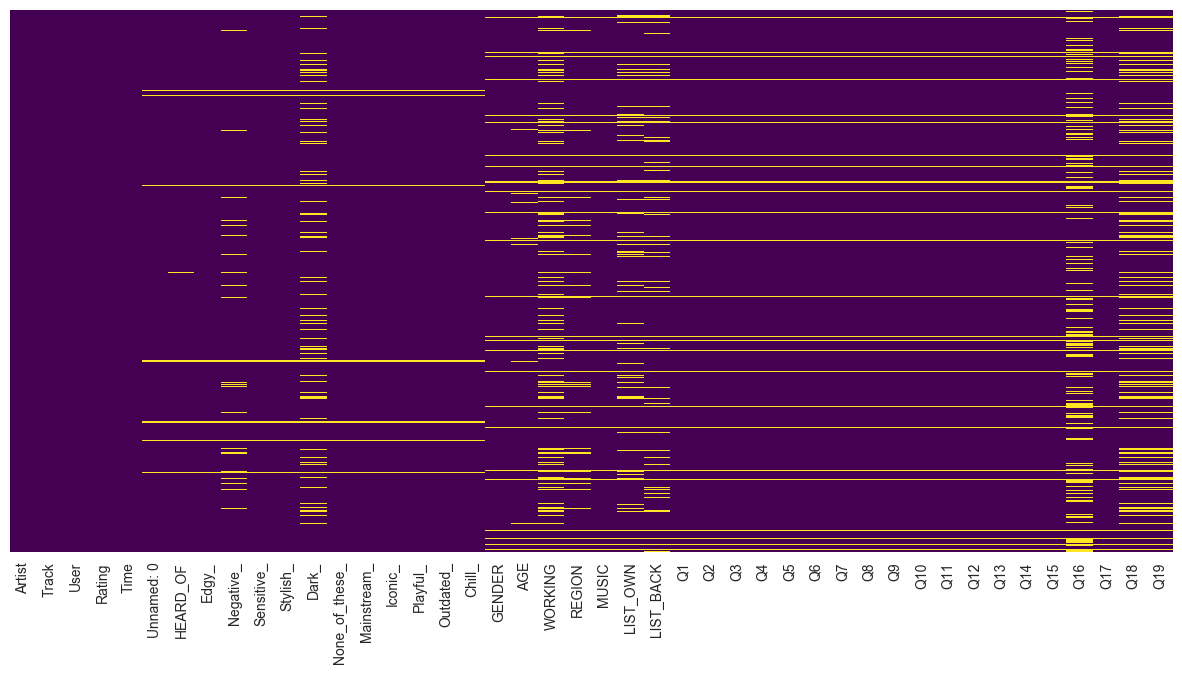

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(train_words_users.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [12]:
train_words_users.shape

(188690, 44)

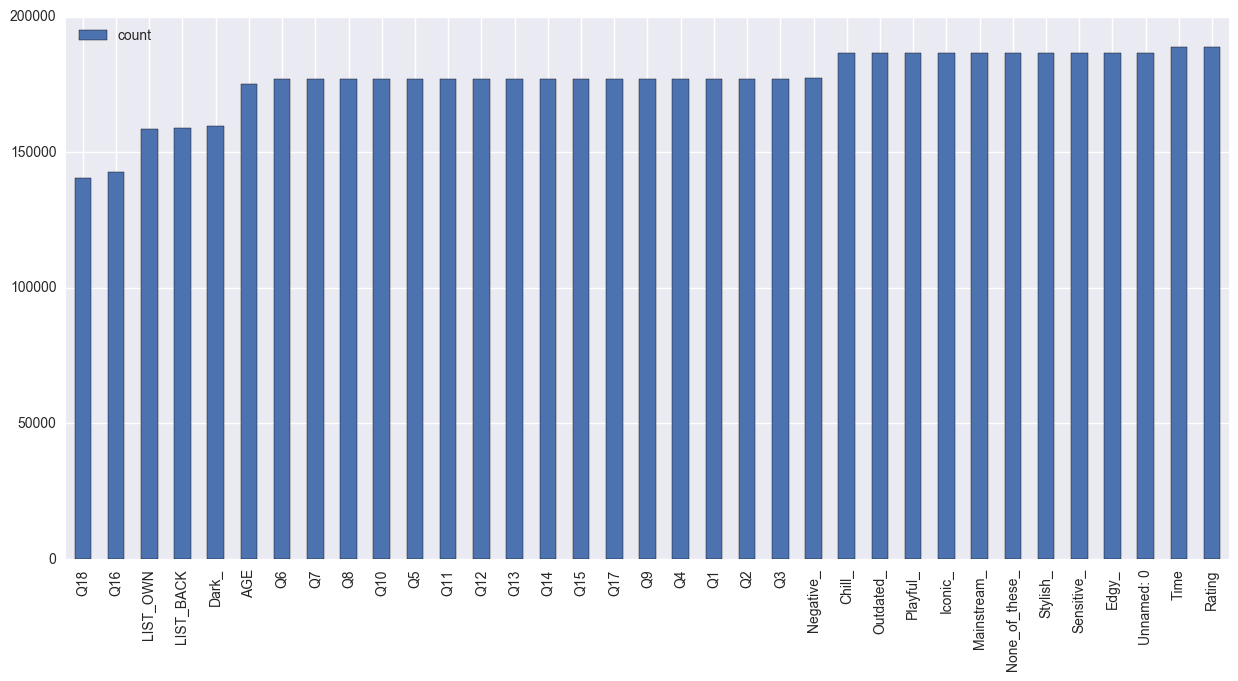

In [13]:
# Find value counts of non-null data
data_counts = train_words_users.describe().iloc[0:1,3:].T.sort_values('count').iloc[1:,:]
data_counts.plot(kind='bar', figsize=(15,7))

#### Drop features with few data points (in this case there are none)

In [14]:
data_drop = train_words_users.dropna(axis=1,thresh=100000)

Features lost...

In [15]:
print 'Features lost: {}'.format(train_words_users.shape[1] - data_drop.shape[1])

Features lost: 0


## Create dummy variables, normalize data


In [16]:
def region_cleaner(x):
    if x == 'North Ireland':
        return 'Northern Ireland'
    else:
        return x

In [17]:
data_drop['REGION'] = data_drop['REGION'].apply(region_cleaner)

In [18]:
data_drop.columns

Index([u'Artist', u'Track', u'User', u'Rating', u'Time', u'Unnamed: 0',
       u'HEARD_OF', u'Edgy_', u'Negative_', u'Sensitive_', u'Stylish_',
       u'Dark_', u'None_of_these_', u'Mainstream_', u'Iconic_', u'Playful_',
       u'Outdated_', u'Chill_', u'GENDER', u'AGE', u'WORKING', u'REGION',
       u'MUSIC', u'LIST_OWN', u'LIST_BACK', u'Q1', u'Q2', u'Q3', u'Q4', u'Q5',
       u'Q6', u'Q7', u'Q8', u'Q9', u'Q10', u'Q11', u'Q12', u'Q13', u'Q14',
       u'Q15', u'Q16', u'Q17', u'Q18', u'Q19'],
      dtype='object')

In [19]:
# Create dummy variables
dummy_cols = ['GENDER','REGION','HEARD_OF','MUSIC','WORKING','LIST_OWN','LIST_BACK']
for i in dummy_cols:
    data_drop = pd.concat([data_drop, pd.get_dummies(data_drop[i], prefix=i, drop_first=True)],axis=1)
    data_drop = data_drop.drop(i,axis=1)


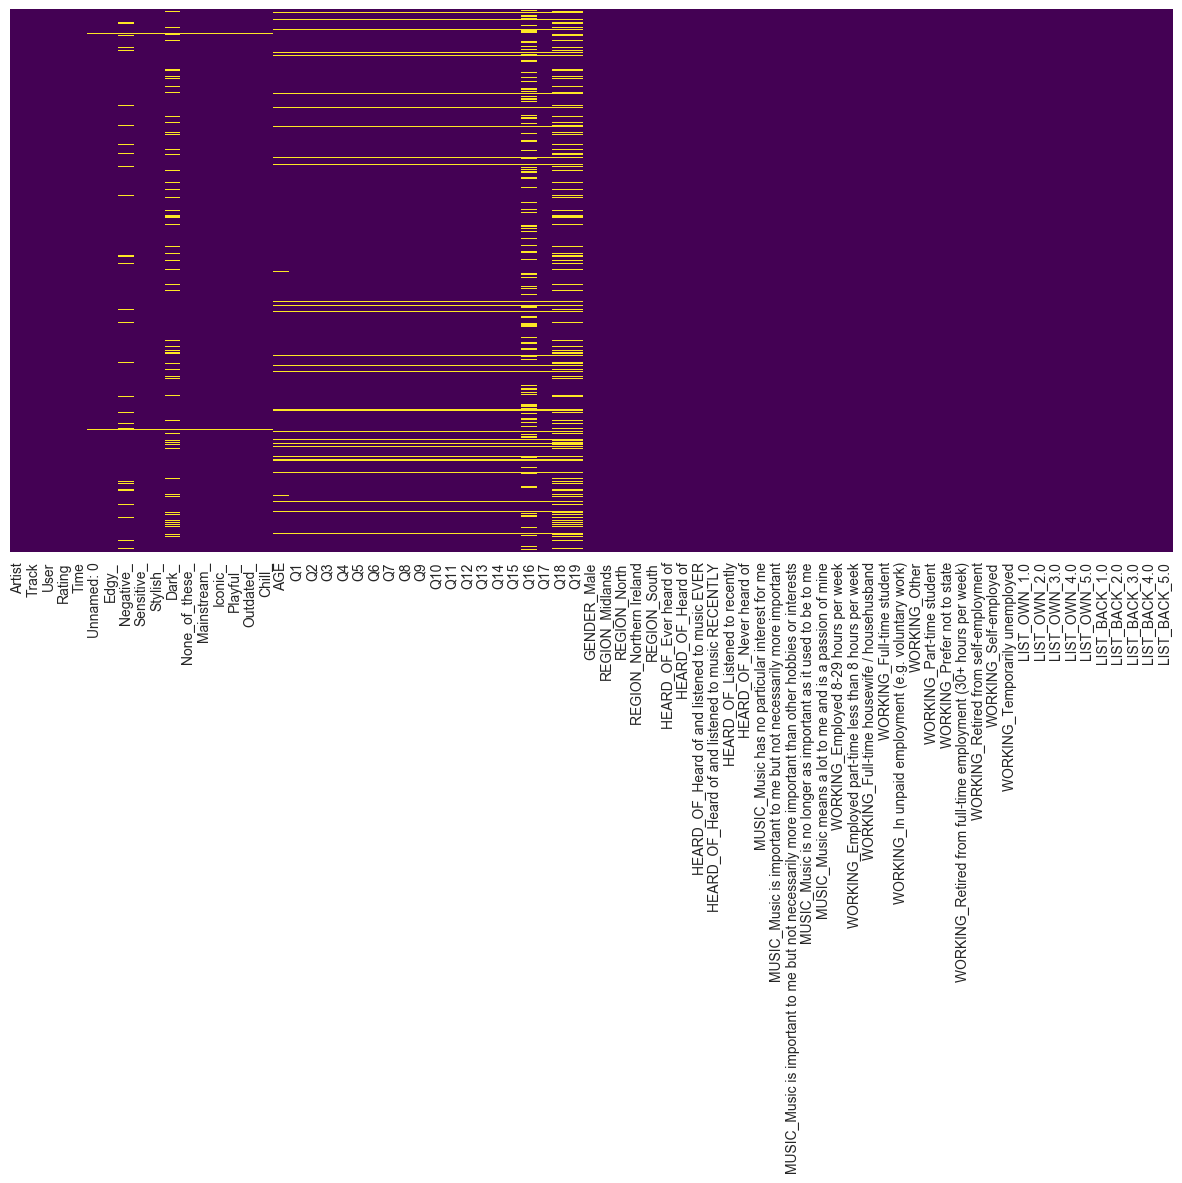

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(data_drop.isnull(),yticklabels=False, cbar=False, cmap='viridis')

# Fill in null values with mean of columns

In [21]:
mean_values = {}
for i in data_drop.columns:
    mean_values[i] = data_drop[i].mean()
mean_values

{'AGE': 39.246922540604174,
 'Artist': 22.207753458052892,
 'Chill_': 0.15120367989027517,
 'Dark_': 0.07998747651847214,
 'Edgy_': 0.07517842216929423,
 'GENDER_Male': 0.46609783242355185,
 'HEARD_OF_Ever heard of': 0.009576554136414225,
 'HEARD_OF_Heard of': 0.188102178175844,
 'HEARD_OF_Heard of and listened to music EVER': 0.15821718162064763,
 'HEARD_OF_Heard of and listened to music RECENTLY': 0.09458370872860247,
 'HEARD_OF_Listened to recently': 0.011611638136626213,
 'HEARD_OF_Never heard of': 0.4986485770311092,
 'Iconic_': 0.10852455522457033,
 'LIST_BACK_1.0': 0.4796597593937146,
 'LIST_BACK_2.0': 0.11940749377285495,
 'LIST_BACK_3.0': 0.03169219354496794,
 'LIST_BACK_4.0': 0.006502729344427367,
 'LIST_BACK_5.0': 0.015793099793311782,
 'LIST_OWN_1.0': 0.5222534315544014,
 'LIST_OWN_2.0': 0.06289681488155176,
 'LIST_OWN_3.0': 0.01931209921034501,
 'LIST_OWN_4.0': 0.003826381896231915,
 'LIST_OWN_5.0': 0.010689490699030156,
 'MUSIC_Music has no particular interest for me': 0.

In [22]:
for i in data_drop.columns:
    data_drop[i].fillna(value=mean_values[i], inplace=True)

In [23]:
data_clean = data_drop

In [24]:
data_clean.head()

,Artist,Track,User,Rating,Time,Unnamed: 0,Edgy_,Negative_,Sensitive_,Stylish_,...,LIST_OWN_1.0,LIST_OWN_2.0,LIST_OWN_3.0,LIST_OWN_4.0,LIST_OWN_5.0,LIST_BACK_1.0,LIST_BACK_2.0,LIST_BACK_3.0,LIST_BACK_4.0,LIST_BACK_5.0
0,40,179,47994,9,17,81397.0,0.000000,0.250000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,23,8575,58,7,94483.0,0.000000,0.000000,0.222222,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,46,168,45475,13,16,98763.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,153,39508,42,15,991.0,0.333333,0.222222,0.000000,0.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,32,11565,54,19,73702.0,0.000000,0.000000,0.000000,0.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
print "Shape of dataset with null values replaced with mean:"
print 
print "Rows: {}".format(data_clean.shape[0])
print "Features: {}".format(data_clean.shape[1])

Shape of dataset with null values replaced with mean:

Rows: 188690
Features: 75


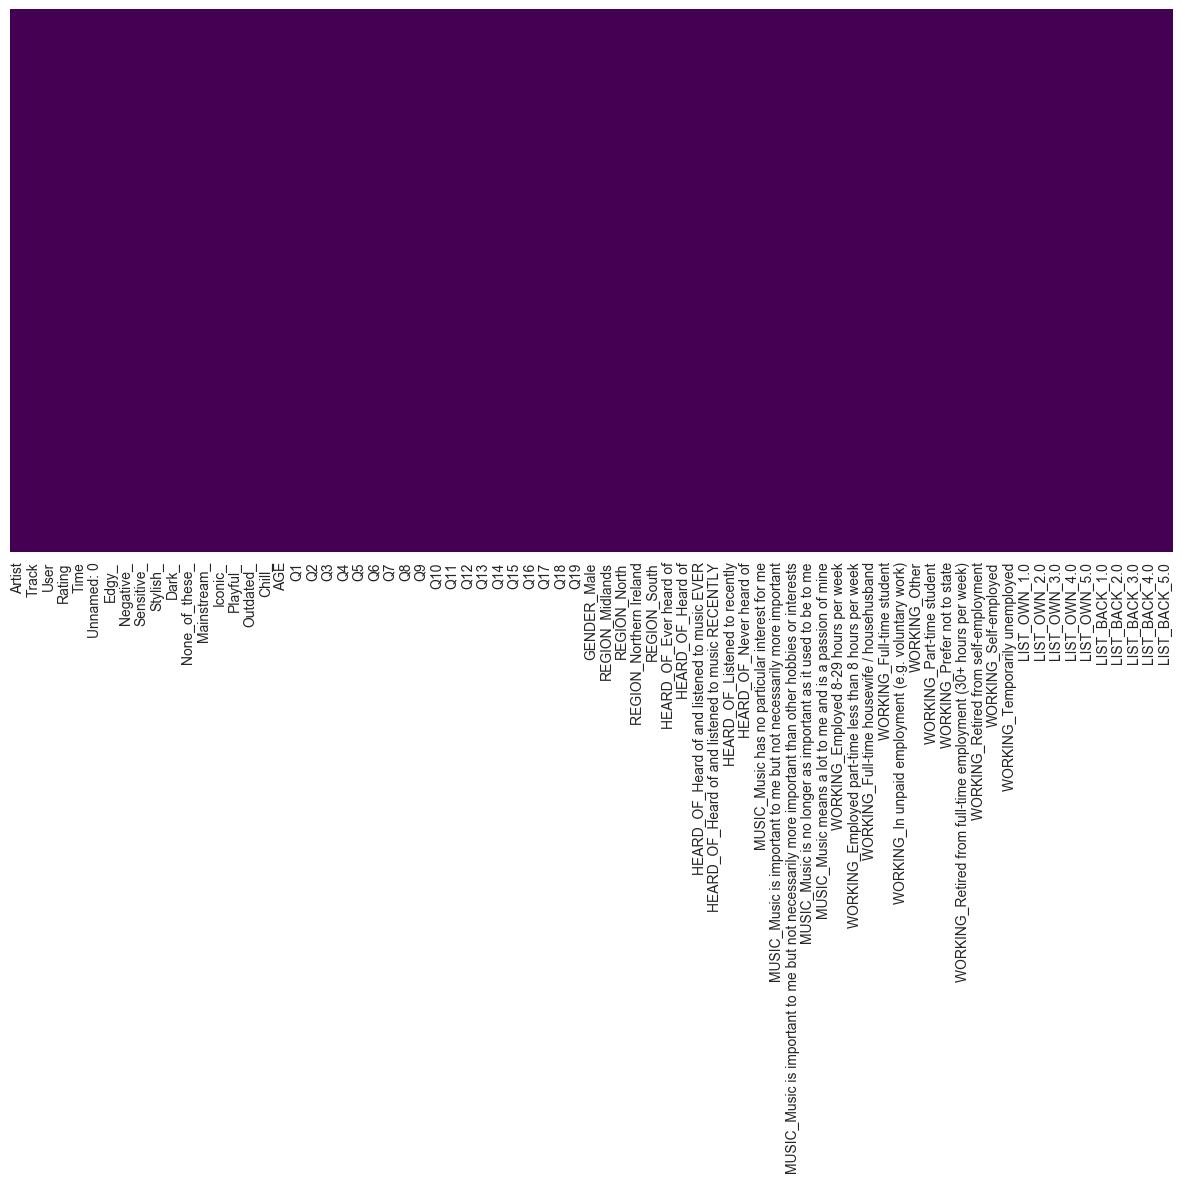

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(data_clean.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [27]:
data_clean.to_csv(path_or_buf='/Users/johnsnyder/GA-DSI-working/Capstone/EMI/clean_data_cat_mean_imputes.csv')

## Data problem, and solution, explained
Originally, there were a slew of null values in the dataset. Due to some mismatches in the dataset - for example, some interviews gave a different list of words to respondents, and some respondent ID numbers do not match up with ID numbers in the training data set - if we simply drop any rows with null values, we lose the *entire* data set. In other words, every row of data contains at least one null value.

By categorizing the words and imputing remaining null values with the mean of their respective column, we can retain a dataset with the original number of rows. While we do lose some features, the loss of features may be satisfied by the gain of additional rows of data.

Let's quickly take a closer look at what values have been lost through data cleaning and mismatches in the dataset...

In [31]:
# Comparing number of unique users in the "users.csv" file compared to unique users in the "words.csv" file.
lstU = users.User.unique()
lstW = words.User.unique()
user_test = []
for x in lstW:
    if x in lstU:
        pass
    else:
        user_test.append(x)
        
print "Difference in total unique users between Users and Words datasets: ", len(user_test)
print "Users (users.csv): ", len(lstU)
print "Users (words.csv): ", len(lstW)

Difference in total unique users between Users and Words datasets:  2283
Users (users.csv):  48645
Users (words.csv):  50928


In [32]:
# Comparing number of unique artists in the "users.csv" file compared to unique artists in the "train.csv" file.
ArtW = words.Artist.unique()
ArtT = train.Artist.unique()
art_test = []
for x in ArtW:
    if x in ArtT:
        pass
    else:
        art_test.append(x)
        
print "Total unique artists lost: ", len(art_test)
print "Artists (words.csv): ", len(ArtW)
print "Artists (train.csv): ", len(ArtT)

Total unique artists lost:  0
Artists (words.csv):  50
Artists (train.csv):  50


In [33]:
# Looking into the values we dropped due to missing necessary values
null_data = data_drop[data_drop.isnull().any(axis=1)]
print null_data.shape
null_data.head()

(0, 109)


,Artist,Track,User,Rating,Time,Aggressive,Edgy,Thoughtful,Serious,Good lyrics,...,LIST_OWN_1.0,LIST_OWN_2.0,LIST_OWN_3.0,LIST_OWN_4.0,LIST_OWN_5.0,LIST_BACK_1.0,LIST_BACK_2.0,LIST_BACK_3.0,LIST_BACK_4.0,LIST_BACK_5.0


In [38]:
print "Total number of unique users: {:,}".format(pd.concat((users.User, words.User, train.User), axis = 0).nunique())
print "Total number of unique users (respondent background info): {:,}".format(users.User.nunique())
print "Total number of unique users after data clean: {:,}".format(data_clean.User.nunique())
print "% of original users remaining: {0:.2f}%".format(100*float(data_clean.User.nunique()) /\
                                        pd.concat((users.User, words.User, train.User), axis = 0).nunique())

Total number of unique users: 50,928
Total number of unique users (respondent background info): 48,645
Total number of unique users after data clean: 49,479
% of original users remaining: 97.15%


## OK, so...

The above check shows that zero artists and about only 2.85% of total users were lost through the merging of data rather than through dropping null values.

Given the alternative method of cleaning this dataset through categorizing words.csv, this is a good result.